<a href="https://colab.research.google.com/github/Mehedihasan097/ML/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn Prediction**

**Overview**

In the banking industry, it is important to predict and understand when customers might decide to end their relationship with the bank, known as customer churn. When customers leave, it can lead to financial losses and impact the bank's reputation.By identifying customers who are likely to churn, the bank can proactively take measures to retain them and minimize revenue loss.Therefore, the goal of this project is to develop a system that can accurately predict customer churn in order to take proactive steps to retain these customers.

**Objective**

The main objective of this project is to create a model that can predict which bank customers are likely to leave in the near future. By identifying these at-risk customers, the bank can implement strategies to keep them engaged and satisfied, ultimately reducing churn rates and improving customer retention.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
 df = pd.read_csv('churn.csv')
 df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Understanding**


*   RowNumber—corresponds to the record (row) number and has no effect on the output.
*   CustomerId—contains random values and has no effect on customer leaving the bank.
*   Surname—the surname of a customer has no impact on their decision to leave the bank.
*   CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
*   Geography—a customer’s location can affect their decision to leave the bank.
*   Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
*   Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
*   Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
*   Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
*   NumOfProducts—refers to the number of products that a customer has purHasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
*  IsActiveMember—active customers are less likely to leave the bank.
*   EstimatedSalary—as with balance, people with lower salaries are more likely to Exited—whether or not the customer left the bank.















In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Visualizatizing customer Churn Distribution**

<ipython-input-7-2f3a2f06f94f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_count.index,


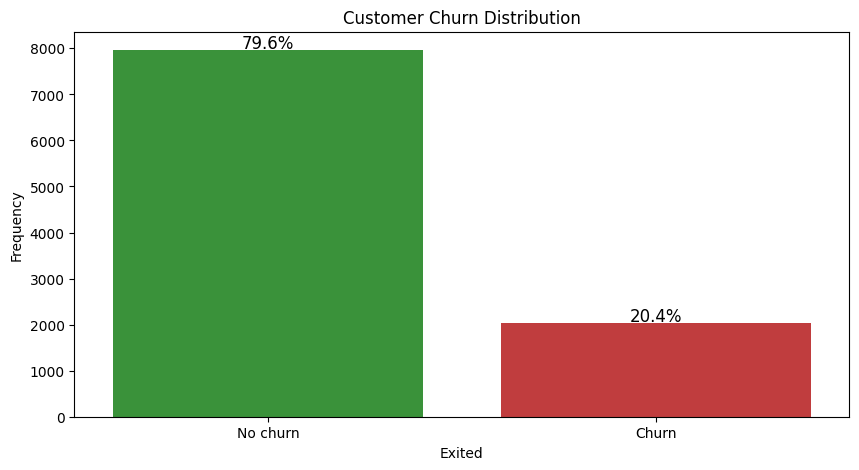

In [ ]:
churn_count = df['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.barplot(x=churn_count.index,
            y=churn_count.values,
            palette= [color_palette[2], color_palette[3]]
            ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                xlabel = 'Exited',
                ylabel = 'Frequency',
                title = 'Customer Churn Distribution'
             )

# Add percentage labels
total_count = sum(churn_count.values)
for i, count in enumerate(churn_count.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

**Visualizing gender Distribution**

<ipython-input-8-9484fbbdd94c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gender'].value_counts().index,


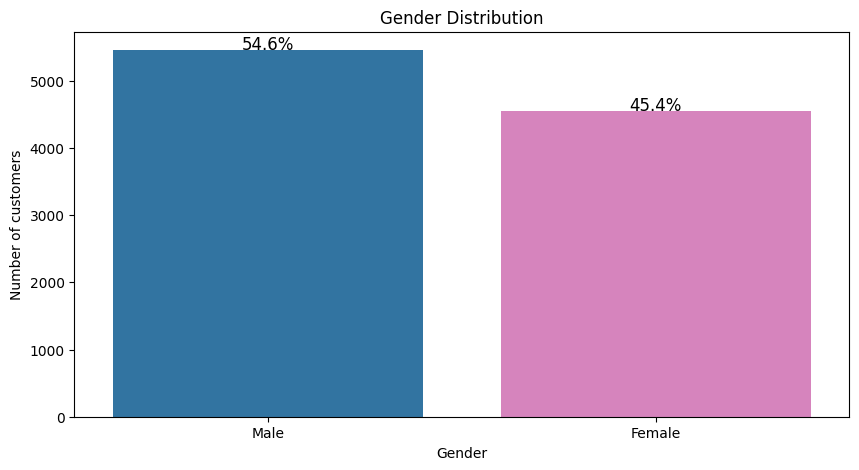

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
color_palette = sns.color_palette()
sns.barplot(x=df['Gender'].value_counts().index,
            y=df['Gender'].value_counts().values,
            palette=[color_palette[0], color_palette[6]]
            ).set(
                ylabel = 'Number of customers',
                xlabel = 'Gender',
                title = 'Gender Distribution'
            )

# Add percentage labels
gender_counts = df['Gender'].value_counts()
total_count = sum(gender_counts.values)
for i, count in enumerate(gender_counts.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

**Visualizing Churn distribution based on gender**

[[<matplotlib.axis.XTick at 0x7953d6fabbb0>,
 [Text(0, 0, 'No churn'), Text(1, 0, 'Churn')],
 Text(0, 0.5, 'Number of customers'),
 Text(0.5, 1.0, 'Churn distribution based on gender')]

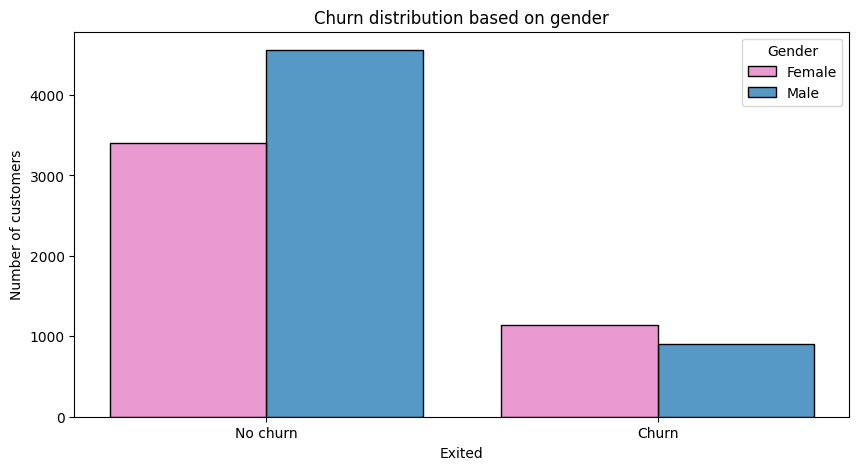

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.histplot(data=df, x='Exited',
             bins=np.arange(3) - 0.5,
             hue='Gender',
             multiple='dodge',
             shrink=.8,
             legend= True,
             palette=[color_palette[6], color_palette[0]]
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on gender'
             )

**Visualizing Churn distribution based on Location**

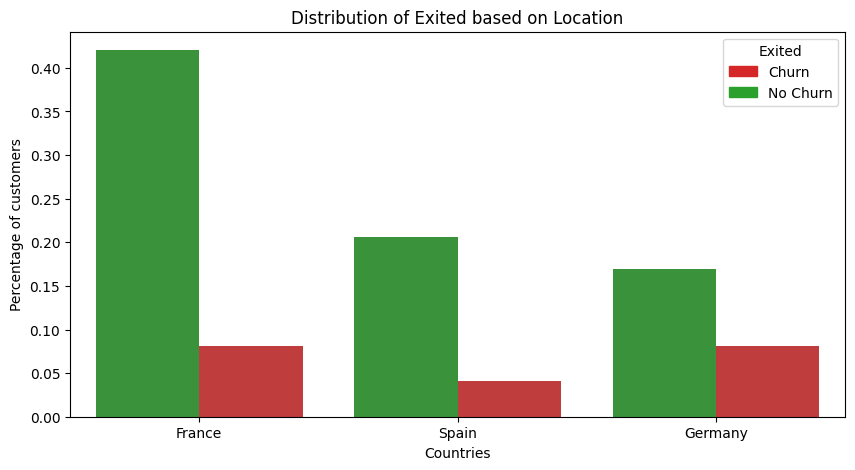

In [ ]:
location_exits_df = pd.DataFrame(df[['Geography', 'Exited']].value_counts(normalize=True)).reset_index()
color_palette = sns.color_palette()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=location_exits_df, x='Geography',
            y='proportion',
            hue='Exited',
            palette=[color_palette[2], color_palette[3]]
             ).set(
                xlabel = 'Countries',
                ylabel = 'Percentage of customers',
                title = 'Distribution of Exited based on Location'
             );

# Create custom legend handles and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_palette[3]), plt.Rectangle((0, 0), 1, 1, color=color_palette[2])]
legend_labels = ["Churn", "No Churn"]

# Set the legend
ax.legend(legend_handles, legend_labels, title='Exited')

**Visualizing distribution of client ages**

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of customers'),
 Text(0.5, 1.0, 'Distribution of client ages')]

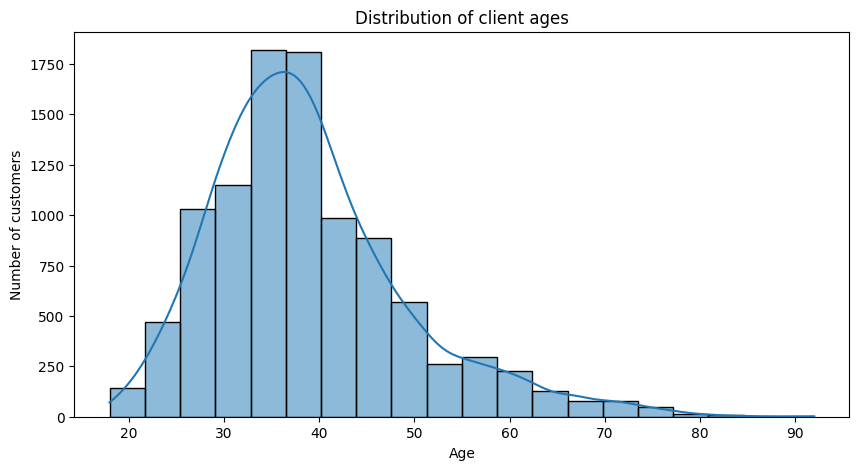

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df,
             x ='Age',
             bins=20,
             ax=ax,
             kde=True
             ).set(
                xlabel = 'Age',
                ylabel = 'Number of customers',
                title = 'Distribution of client ages'
             )

**Visualizing Churn distribution based on Age**

In [ ]:
# Create age bins.
bins = [18, 30, 40, 50, 60, 100]  # Define the bin edges
labels = ['18-30', '31-40', '41-50', '51-60', '61+']  # Define the labels for each bin

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Print the modified DataFrame
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,18-30


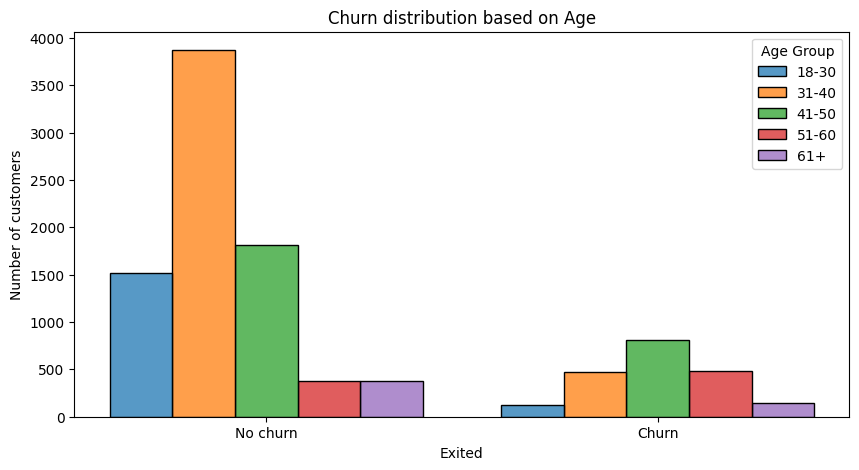

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Exited',
             bins=np.arange(3) - 0.5,
             hue='Age Group',
             multiple='dodge',
             shrink=.8,
             legend= True
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on Age'
             );

**Data Preparation**

**Removing irrelevant columns**

In [ ]:
df.drop(['RowNumber', 'Surname', 'Age Group'], axis=1, inplace=True)
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

**Checking for duplicate values using the 'CustomerId' column**

In [ ]:
df['CustomerId'].duplicated(keep=False).sum()

0

In [ ]:
# dropping the CustomerId column since its no longer required
df.drop(['CustomerId'], axis=1, inplace=True)

**Checking for multicolinearity**

In [ ]:
cont_cols = [i for i in df.columns if df[i].dtype in ['float64', 'int64']]
cont_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

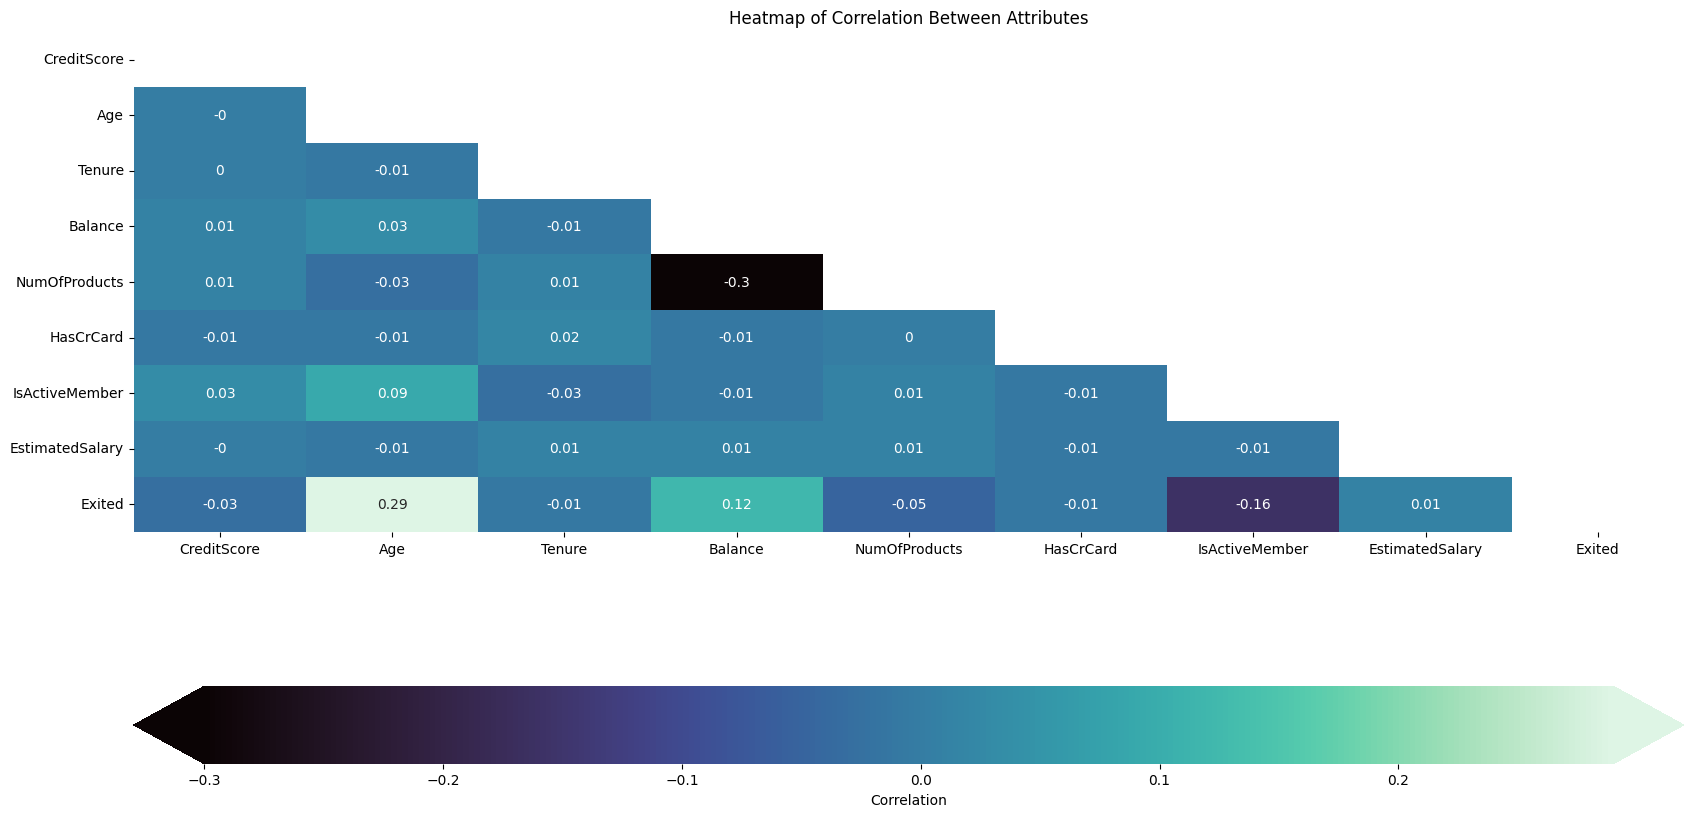

In [ ]:
# df with the correlation matrix
corr = round(df[cont_cols].corr(), 2)

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(20,10))

# Plotting a heatmap of the correlation matrix(train_corr), with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifying the data to be plotted
    data = corr,

    # The mask is used to ensure duplicates are not shown
    mask=np.triu(np.ones_like(corr, dtype=bool)),

    # Specifying the that the existing axes (ax) should be used
    ax=ax,

    # Specifying that the labels should be shown too.
    annot=True,

    # Customizing the  colorbar appearance
    cmap="mako",
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}

)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

# Observation:
    # There is not multicolinearity

**Checking for outliers**

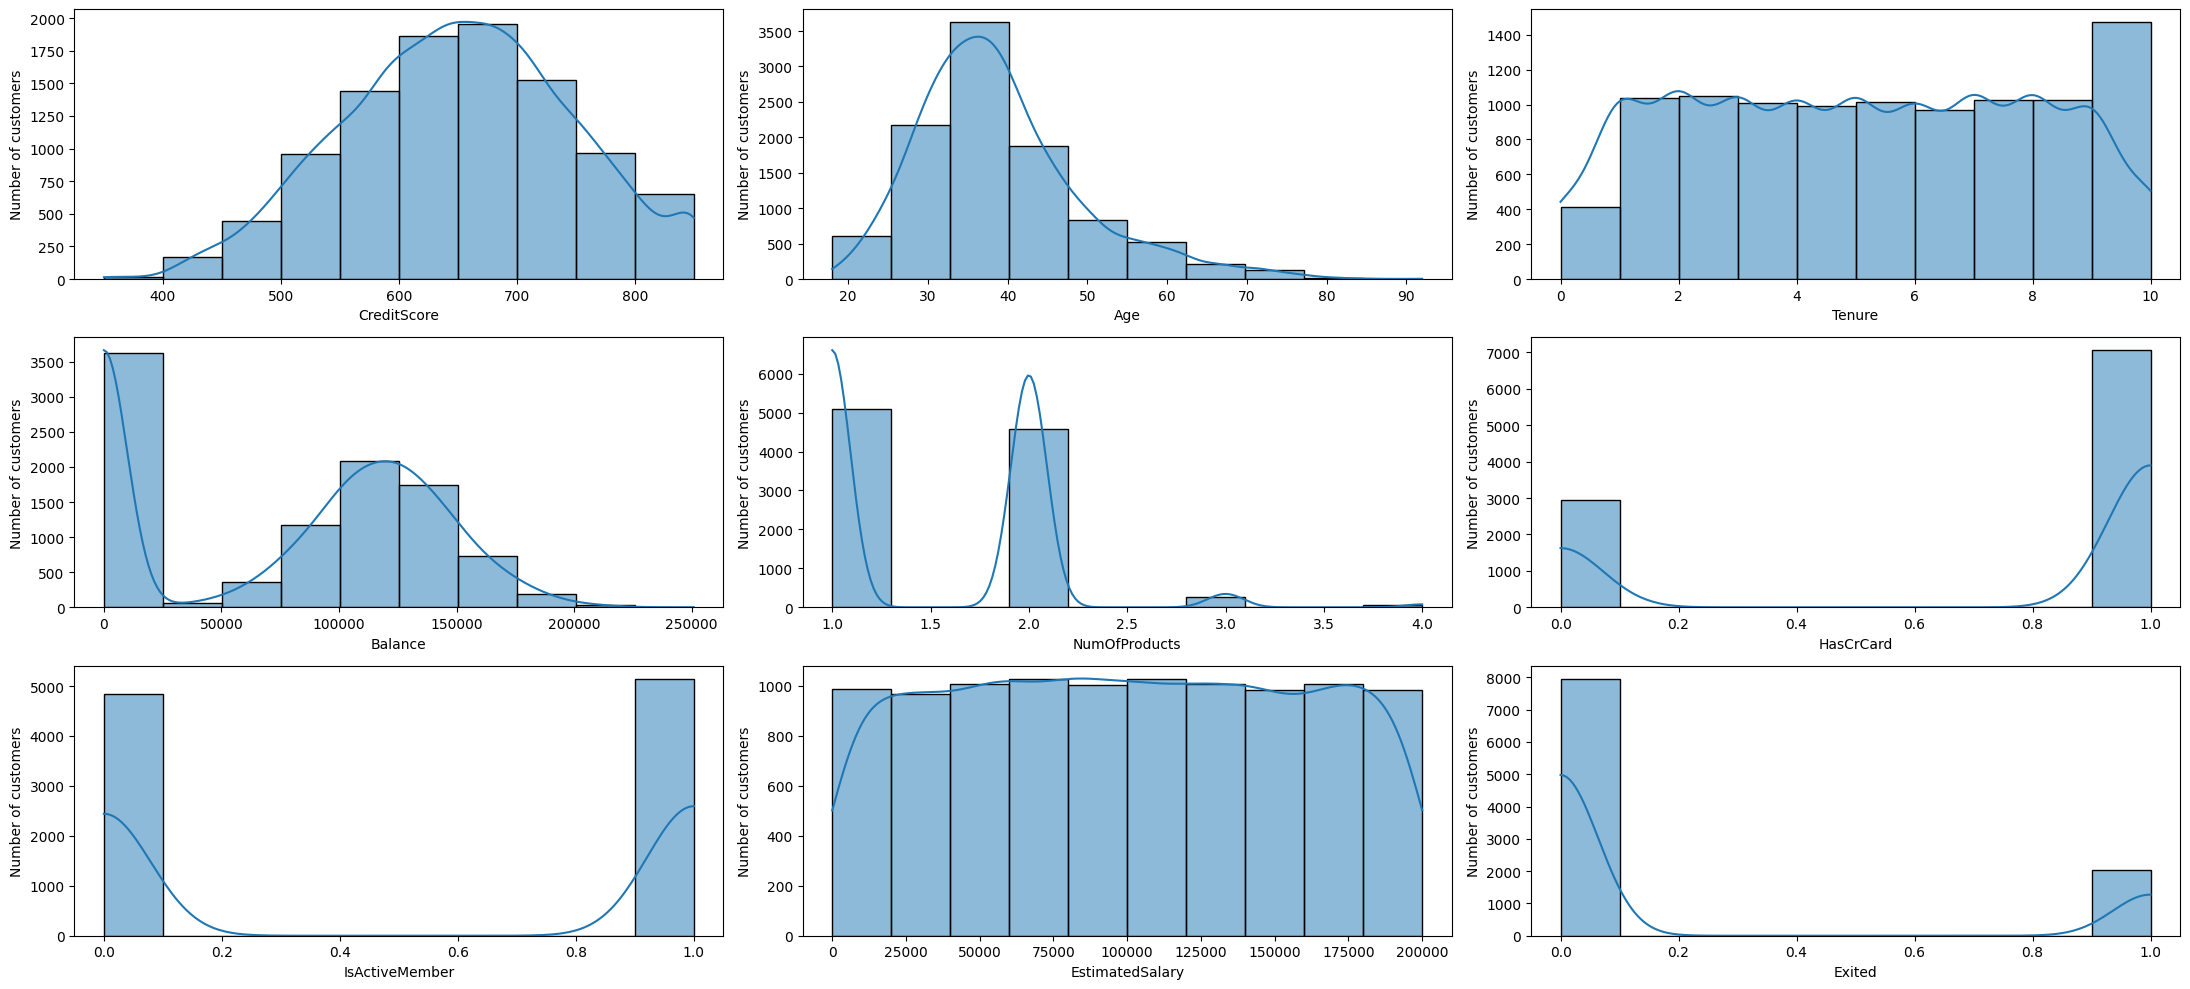

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(22,10))
for i, col in enumerate(cont_cols):
     ax = axes[i//3][i%3]
     sns.histplot(df[col], bins=10 ,kde=True, ax=ax)
     ax.set_xlabel(col)
     ax.set_ylabel("Number of customers")
fig.set_tight_layout(True);

# Observation:
     # The data has no outliers

**Converting categorical columns to numerical**

In [ ]:
[i for i in df.columns if df[i].dtype in ['O']]

['Geography', 'Gender']

In [ ]:
# For gender, we can give 1 for male and 0 for female
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female':0})
df['Gender'].value_counts()

<ipython-input-21-b21904806058>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female':0})


,count
Gender,
1,5457
0,4543


In [ ]:
# For Geography, we can represent France with 1, Spain with 2 and Germany with 3

df['Geography'] = df['Geography'].replace({'France': 1, 'Spain':2, 'Germany':3})
df['Geography'].value_counts()

<ipython-input-22-ac723770db1e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography'] = df['Geography'].replace({'France': 1, 'Spain':2, 'Germany':3})


,count
Geography,
1,5014
3,2509
2,2477


In [ ]:
# Confirming all datatype are numerical
df.dtypes

,0
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


**Train Test Split**

In [ ]:
# The values
X = df.drop('Exited', axis=1)

# The target column(label)
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalizing the data**

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Modelling**

The main evaluation metric that will be used is precision. This is because we do not want to waste the companies resources trying to retain customers who would not have churned anyway. Hence, we want the model to produce only cases where the customer would have churned. Accuracy is also being used as a secondary metric to be able to see how many times the model is predicting accurately in the test set.

In [ ]:
#Models to be tested
models = { 'Model' : ['Baseline Decision Tree', 'Second Decision Tree', 'logistic regression',
                      'KNeighborsClassifier', 'Baseline Random Forest Classifier', 'XGBoost Classifier',
                      'Random Forest Classifier-Grid Search','Final Model-Random Forest Classifier'],
          'Train Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0],
          'Test Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0]}

#Dataframe holding the model names and accuracy score
df_model_results = pd.DataFrame(models, columns=['Model','Train Accuracy Score(%)', 'Test Accuracy Score(%)'])

#Function to fill the dataframe holding model names and accuracy score
def model_results(model_type,y_train, y_train_pred, y_test, y_test_pred):
  index_val = df_model_results[df_model_results['Model']==model_type].index

  df_model_results.loc[index_val, 'Train Accuracy Score(%)'] = round(accuracy_score(y_train, y_train_pred), 2)*100
  df_model_results.loc[index_val, 'Test Accuracy Score(%)'] = round(accuracy_score(y_test, y_test_pred), 2)*100

  return df_model_results

**Decision Tree Classifier**

In [ ]:
baseline_decision_tree = DecisionTreeClassifier(random_state=42)
baseline_decision_tree.fit(X_train, y_train)

y_test_pred = baseline_decision_tree.predict(X_test)
y_train_pred = baseline_decision_tree.predict(X_train)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Baseline Decision Tree',y_train, y_train_pred, y_test, y_test_pred)

# Observation:
    # The model is overfitting.
    # Customers who churned are not being predicted accurately, the precision score is much lower when compared to
    # customers who did not churn.

*********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,0,0
2,logistic regression,0,0
3,KNeighborsClassifier,0,0
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


**Solving the class imbalance issue observed earlier**

In [ ]:
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


,count
Exited,
0,6356
1,6356


**Fitting decision tree model again after removing the class imbalance and performing feature selection**

In [ ]:
second_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
second_decision_tree.fit(X_train_resampled, y_train_resampled)

y_test_pred = second_decision_tree.predict(X_test)
y_train_pred = second_decision_tree.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Second Decision Tree', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:
# The second model is still overfitting. However, it has improved slightly.

*********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.48      0.49      0.48       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,0,0
3,KNeighborsClassifier,0,0
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


**logistic regression`**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('logistic regression', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:

# This model is underfitting. It does not perform very well in both the train and test set

*********************************************************************
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.81      0.72      0.74      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,0,0
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


**KNeighborsClassifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled, y_train_resampled)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('KNeighborsClassifier', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:

# This model is overfitting and does not perform very well in the test set when compared to the others

*********************************************************************
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1607
           1       0.40      0.56      0.47       393

    accuracy                           0.75      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.79      0.75      0.76      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


**Random Forest Model**

In [ ]:
baseline_random_forest = RandomForestClassifier(random_state=123)
baseline_random_forest.fit(X_train_resampled, y_train_resampled)

y_test_pred = baseline_random_forest.predict(X_test)
y_train_pred = baseline_random_forest.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Baseline Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

# Observation:
    # This is the best performing model so far with an accuracy of 86 and a precision score of 0.68

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.54      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


**XGBoost**

In [ ]:
xgboost_model= XGBClassifier()
xgboost_model.fit(X_train_resampled, y_train_resampled)

y_test_pred = xgboost_model.predict(X_test)
y_train_pred = xgboost_model.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('XGBoost Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

# Observation:
    # This model does not perform as well as the random forest classifier.

*********************************************************************
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1607
           1       0.56      0.62      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,96,83
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


**Tuning Random Forest Classifier**

In [ ]:
tuned_random_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [16, 32, 64, None],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8]
}

random_forest_grid_search = GridSearchCV(tuned_random_forest, param_grid, scoring='accuracy', cv=3, n_jobs=1)
random_forest_grid_search.fit(X_train_resampled, y_train_resampled)

y_test_pred = random_forest_grid_search.predict(X_test)
y_train_pred = random_forest_grid_search.predict(X_train_resampled)


print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Random Forest Classifier-Grid Search', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,96,83
6,Random Forest Classifier-Grid Search,100,86
7,Final Model-Random Forest Classifier,0,0


In [ ]:
#Random Forest Best Parameters
random_forest_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

**Final Model**

In [ ]:
final_model = RandomForestClassifier(criterion = 'gini', max_depth=32, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42)
final_model.fit(X_train_resampled, y_train_resampled)

y_test_pred = final_model.predict(X_test)
y_train_pred = final_model.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Final Model-Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,96,83
6,Random Forest Classifier-Grid Search,100,86
7,Final Model-Random Forest Classifier,100,86


In [ ]:
def plot_feature_importance(model):
    features = X.columns
    importances = np.sort(model.feature_importances_)
    indices = np.argsort(importances)
    num_features = 5

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=importances[indices[-num_features:]], y=[features[i] for i in indices[-num_features:]], ax=ax)
    ax.invert_yaxis()
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')
    ax.set_title('Feature Importance')

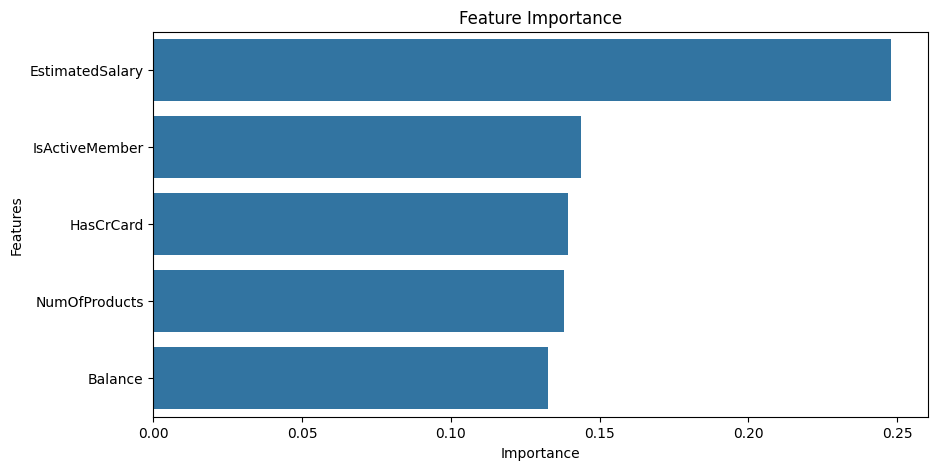

In [ ]:
plot_feature_importance(final_model)

**Confusion Matrix**

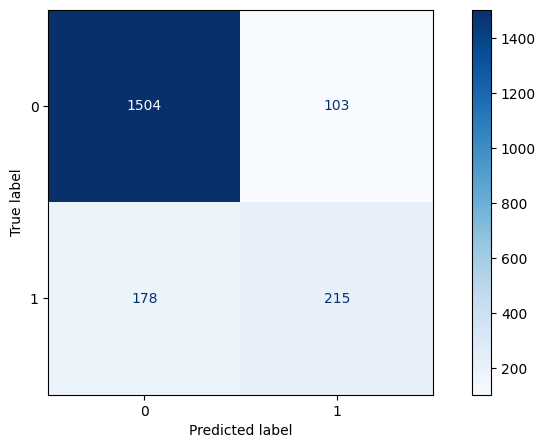

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_test_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=final_model.classes_)
fig, ax = plt.subplots(figsize=(10,5))
matrix.plot(cmap=plt.cm.Blues, ax=ax);